<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
data

In [3]:
#  10 Classes to predict from??
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

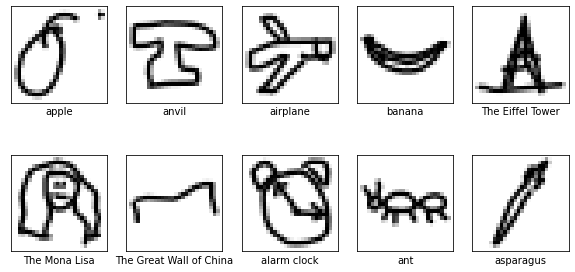

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [5]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [6]:
X.shape

(100000, 784)

In [7]:
# X_train[0]

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.shape

(80000, 784)

In [10]:
X_train[0]
# print(X_train[2])

max_value = 255

X_train = X_train.astype('float32') / max_value
X_test = X_test.astype('float32') / max_value


# reshape the data, i.e. flatten the 3D images into row vectors
# X_train = X_train.reshape((X_train.shape[0], 784))
# X_test = X_test.reshape((X_test.shape[0], 784))

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(80000, 784)
(20000, 784)
(80000,)
(20000,)


In [11]:
from tensorflow import keras
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Stretch - use dropout 
# import numpy as np

In [12]:
X_train[0].shape

(784,)

In [13]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10)
# ])

In [14]:
model.add(
    #  Hidden Layer
    Dense(32, 
          activation='relu', 
          input_dim=784)
)

model.add(
    #  Hidden Layer
    Dense(32, 
          activation='relu')

)

model.add(
    #  output layer, specify the number of labels to predict, here that's 10 Classes
    Dense(10, 
#           activation='relu')
          activation='softmax')
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Compiling Model

In [16]:
model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=[tf.keras.metrics.Precision()])



Fit Model

In [20]:
results = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_test, y_test)
#     callbacks=[tensorboard_callback]
)

Epoch 1/10
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1403 - accuracy: 0.6421 - val_loss: 0.8581 - val_accuracy: 0.7462
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7944 - accuracy: 0.7660 - val_loss: 0.7740 - val_accuracy: 0.7742
Epoch 3/10
2500/2500 [==============================] - 2s 956us/step - loss: 0.7205 - accuracy: 0.7877 - val_loss: 0.7123 - val_accuracy: 0.7975
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6684 - accuracy: 0.8022 - val_loss: 0.6752 - val_accuracy: 0.80481s - loss: 0 - ETA: 0s - los
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6282 - accuracy: 0.8137 - val_loss: 0.6424 - val_accuracy: 0.8138
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5978 - accuracy: 0.8232 - val_loss: 0.6178 - val_accuracy: 0.8202
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5748 - accuracy: 0.8300 - va

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [21]:
results.history

{'loss': [1.140346646308899,
  0.794435977935791,
  0.7205113172531128,
  0.6684094667434692,
  0.6281693577766418,
  0.5978416800498962,
  0.5748332142829895,
  0.5554625988006592,
  0.5401226282119751,
  0.5267673134803772],
 'accuracy': [0.6421124935150146,
  0.7659500241279602,
  0.7876625061035156,
  0.8022124767303467,
  0.8136875033378601,
  0.8231874704360962,
  0.8299624919891357,
  0.834975004196167,
  0.839187502861023,
  0.8433374762535095],
 'val_loss': [0.8581235408782959,
  0.7740401029586792,
  0.7122641205787659,
  0.6751853823661804,
  0.642352819442749,
  0.6177985668182373,
  0.601341962814331,
  0.5825628638267517,
  0.5755805969238281,
  0.5669365525245667],
 'val_accuracy': [0.7462000250816345,
  0.774150013923645,
  0.7975000143051147,
  0.8048499822616577,
  0.8137500286102295,
  0.8201500177383423,
  0.8246999979019165,
  0.8302500247955322,
  0.8330000042915344,
  0.8343999981880188]}

C:\Users\dabor\dev\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dabor\dev\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


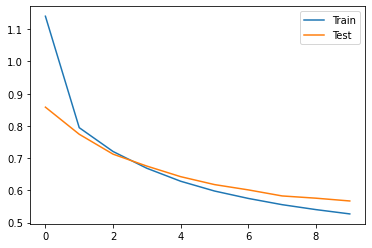

In [22]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
epochs = [i for i in range(len(results.history['loss']))]

# df['epoch'] = [i for i in range(df.shape[0])]


ax = sns.lineplot(epochs, results.history['loss'], label="Train")
ax = sns.lineplot(epochs, results.history['val_loss'], label="Test");
# ax = sns.lineplot(x='epoch', y='val_loss', data=df, label=)
# ax = sns.lineplot(x='epoch', y='loss', data=df, label=);

In [ ]:
# %tensorboard --logdir logs

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [24]:
model.add(
    #  Hidden Layer
    Dense(32, 
          activation='relu', 
          input_dim=784)
)

model.add(
    #  Hidden Layer
    Dense(32, 
          activation='relu')

)

model.add(
    #  output layer, specify the number of labels to predict, here that's 10 Classes
    Dense(10, 
#           activation='relu')
          activation='softmax')
)


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


results = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_test, y_test)
#     callbacks=[tensorboard_callback]
)

Epoch 1/10
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0901 - accuracy: 0.6198 - val_loss: 0.7540 - val_accuracy: 0.7714
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6399 - accuracy: 0.8188 - val_loss: 0.6146 - val_accuracy: 0.8235
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5622 - accuracy: 0.8385 - val_loss: 0.5802 - val_accuracy: 0.8335
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5282 - accuracy: 0.8467 - val_loss: 0.5706 - val_accuracy: 0.8369
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5041 - accuracy: 0.8533 - val_loss: 0.5527 - val_accuracy: 0.8439
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4847 - accuracy: 0.8587 - val_loss: 0.5526 - val_accuracy: 0.8428
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4689 - accuracy: 0.8631 - val_loss: 0.5805 - val_accuracy:

C:\Users\dabor\dev\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dabor\dev\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


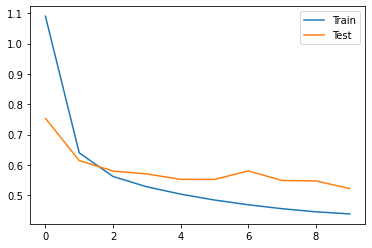

In [26]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
epochs = [i for i in range(len(results.history['loss']))]

# df['epoch'] = [i for i in range(df.shape[0])]


ax = sns.lineplot(epochs, results.history['loss'], label="Train")
ax = sns.lineplot(epochs, results.history['val_loss'], label="Test");

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)